# APPLE STOCK PREDICTION   (01/22-02/24)

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

In [71]:
df = pd.read_csv('APPLE_STOCK.csv')
df.head()

,Open,High,Low,Close,Volume,Day,Month,Year
0,186.86,189.31,186.77,189.30,43490762,6,2,2024
1,188.15,189.25,185.84,187.68,69668812,5,2,2024
2,179.86,187.33,179.25,185.85,102551695,2,2,2024
3,183.99,186.95,183.82,186.86,64885406,1,2,2024
4,187.04,187.10,184.35,184.40,55467801,31,1,2024


In [72]:
df.shape

(502, 8)

In [73]:
df.describe()

,Open,High,Low,Close,Volume,Day,Month,Year
count,502.000000,502.000000,502.000000,502.000000,5.020000e+02,502.000000,502.000000,502.00000
mean,164.340996,166.175398,162.696335,164.541394,7.150024e+07,15.713147,6.531873,2022.59761
std,18.387166,18.082682,18.625904,18.370989,2.429577e+07,8.811249,3.434877,0.58374
min,126.010000,127.770000,124.170000,125.020000,2.404834e+07,1.000000,1.000000,2022.00000
25%,148.877500,150.925000,147.252500,149.362500,5.362579e+07,8.000000,4.000000,2022.00000
50%,165.010000,166.600000,163.775000,165.340000,6.746870e+07,16.000000,7.000000,2023.00000
75%,178.312500,179.817500,177.040000,178.692500,8.380564e+07,23.000000,9.750000,2023.00000
max,198.020000,199.620000,197.000000,198.110000,1.826020e+08,31.000000,12.000000,2024.00000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    502 non-null    float64
 1   High    502 non-null    float64
 2   Low     502 non-null    float64
 3   Close   502 non-null    float64
 4   Volume  502 non-null    int64  
 5   Day     502 non-null    int64  
 6   Month   502 non-null    int64  
 7   Year    502 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 31.5 KB


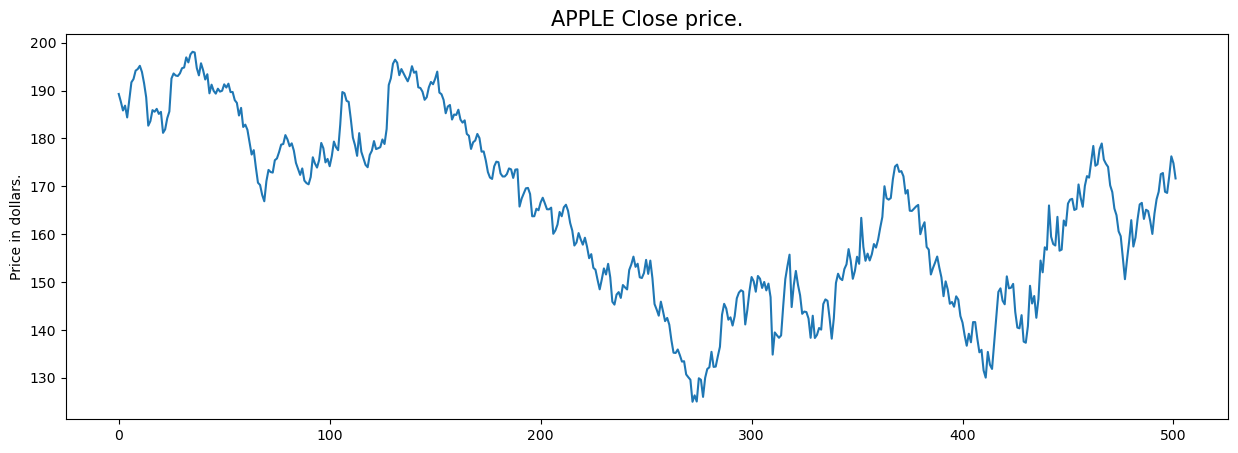

In [75]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('APPLE Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [76]:
df.head()

,Open,High,Low,Close,Volume,Day,Month,Year
0,186.86,189.31,186.77,189.30,43490762,6,2,2024
1,188.15,189.25,185.84,187.68,69668812,5,2,2024
2,179.86,187.33,179.25,185.85,102551695,2,2,2024
3,183.99,186.95,183.82,186.86,64885406,1,2,2024
4,187.04,187.10,184.35,184.40,55467801,31,1,2024


In [77]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Day       0
Month     0
Year      0
dtype: int64

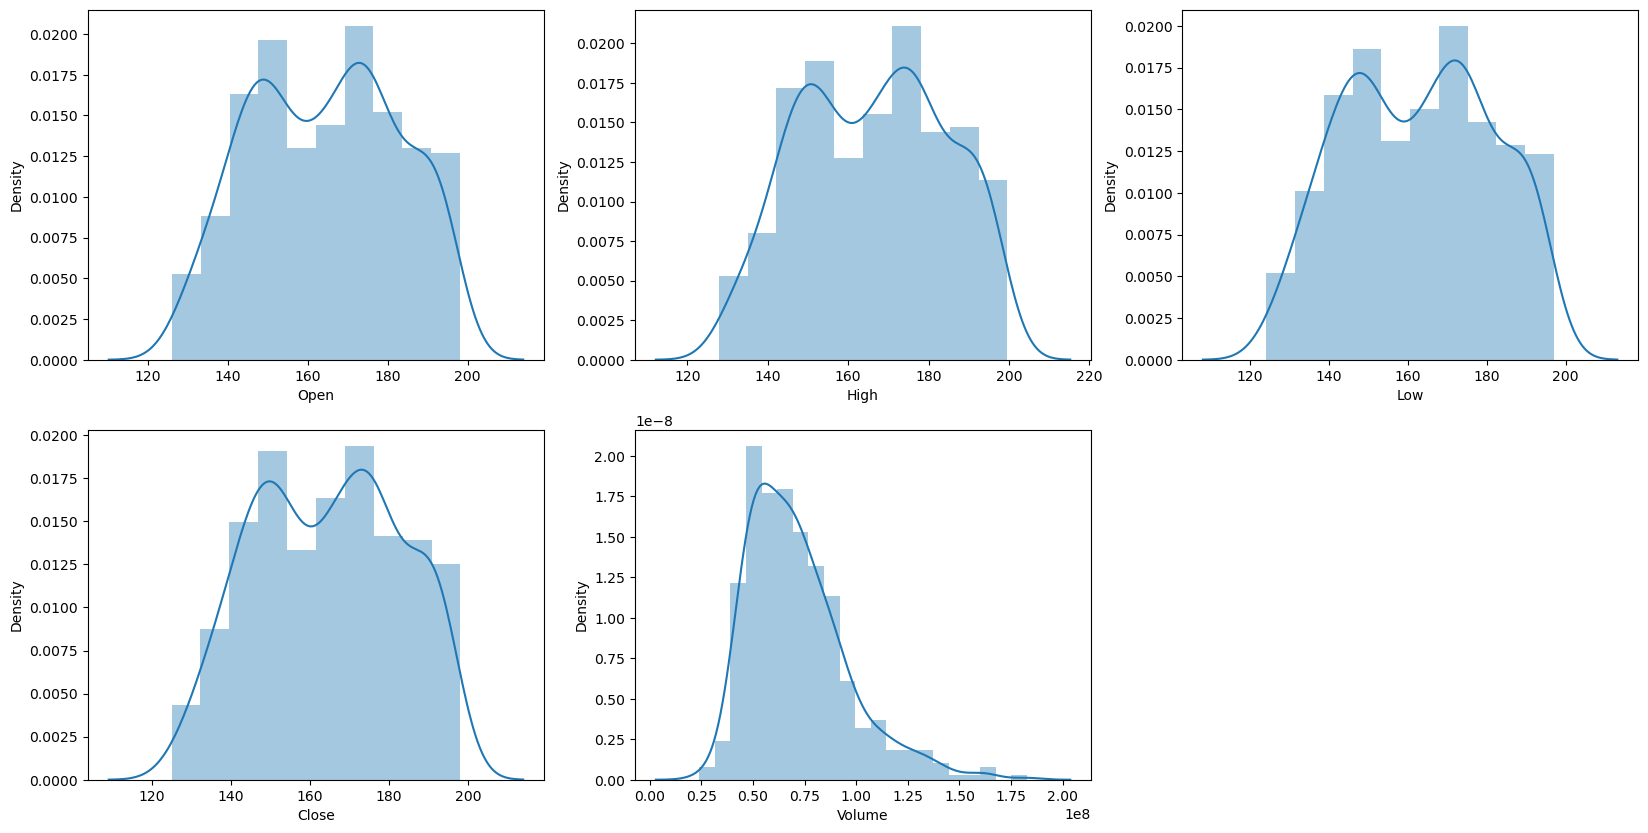

In [78]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(df[col])
plt.show()

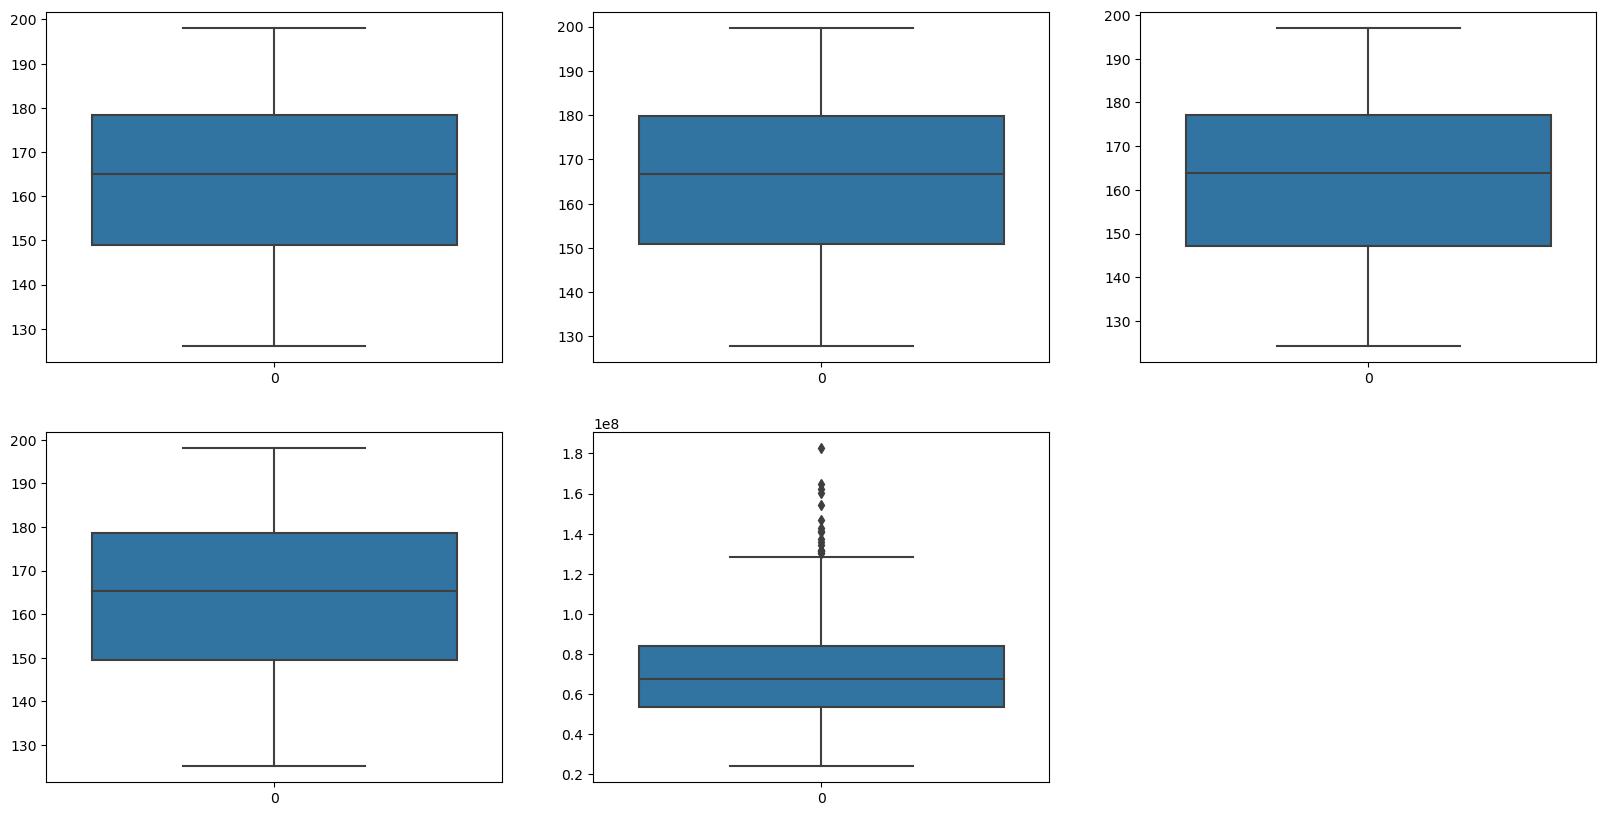

In [79]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col])
plt.show()

In [80]:

df.head()

,Open,High,Low,Close,Volume,Day,Month,Year
0,186.86,189.31,186.77,189.30,43490762,6,2,2024
1,188.15,189.25,185.84,187.68,69668812,5,2,2024
2,179.86,187.33,179.25,185.85,102551695,2,2,2024
3,183.99,186.95,183.82,186.86,64885406,1,2,2024
4,187.04,187.10,184.35,184.40,55467801,31,1,2024


In [81]:
df['is_quarter_end'] = np.where(df['Month']%3==0,1,0)
df.head()

,Open,High,Low,Close,Volume,Day,Month,Year,is_quarter_end
0,186.86,189.31,186.77,189.30,43490762,6,2,2024,0
1,188.15,189.25,185.84,187.68,69668812,5,2,2024,0
2,179.86,187.33,179.25,185.85,102551695,2,2,2024,0
3,183.99,186.95,183.82,186.86,64885406,1,2,2024,0
4,187.04,187.10,184.35,184.40,55467801,31,1,2024,0


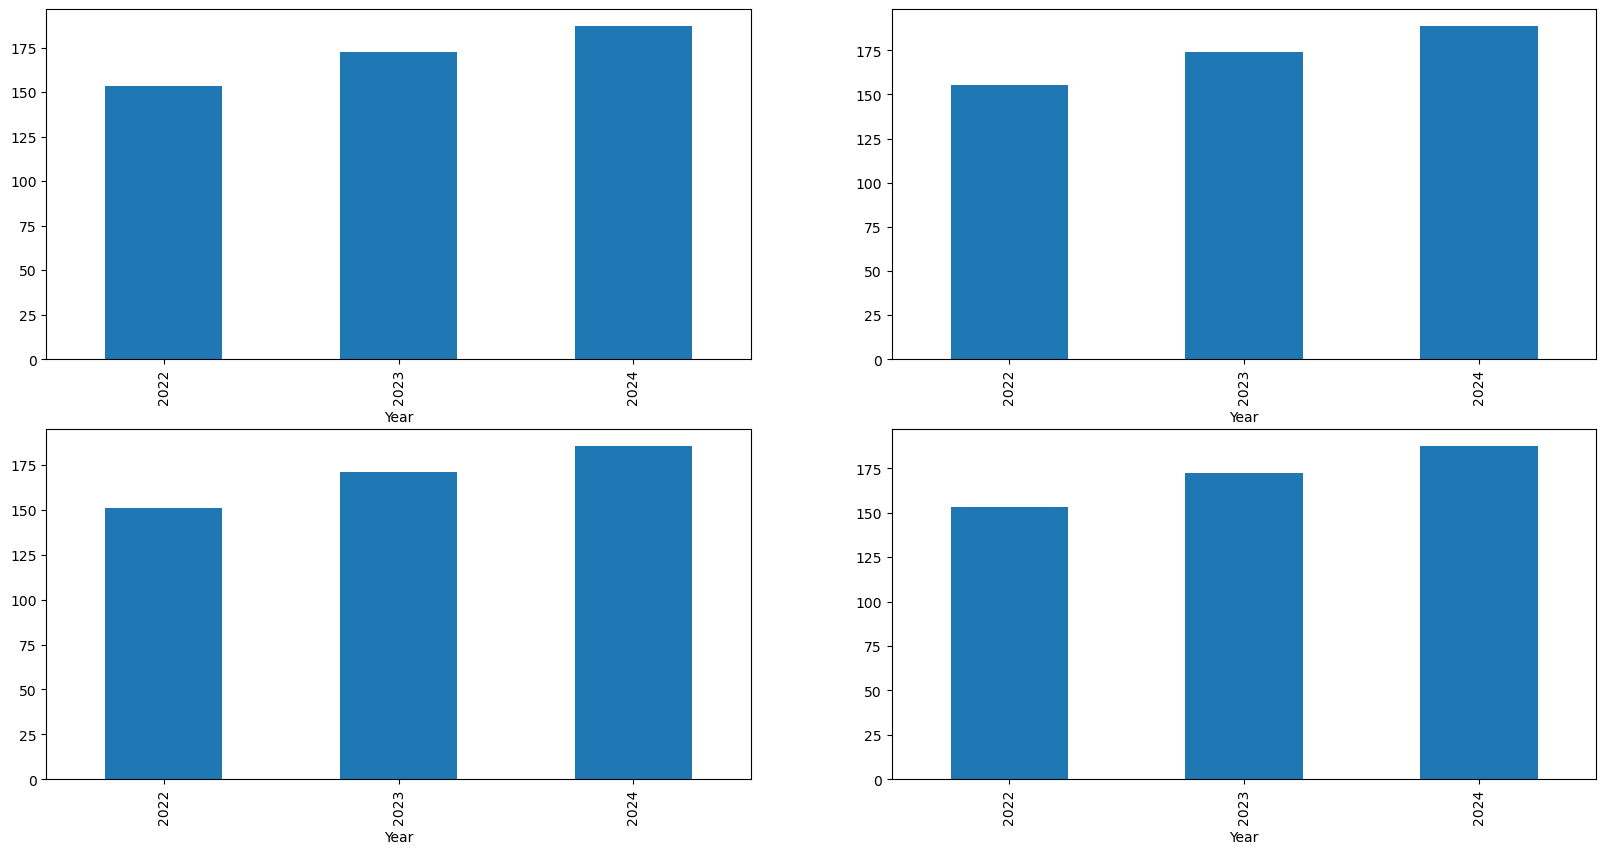

In [82]:
data_grouped = df.groupby('Year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [83]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,Day,Month,Year
is_quarter_end,,,,,,,,
0,165.035090,166.907590,163.452108,165.340482,6.922606e+07,15.557229,6.108434,2022.650602
1,162.985471,164.745471,161.220353,162.980824,7.594157e+07,16.017647,7.358824,2022.494118


In [84]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

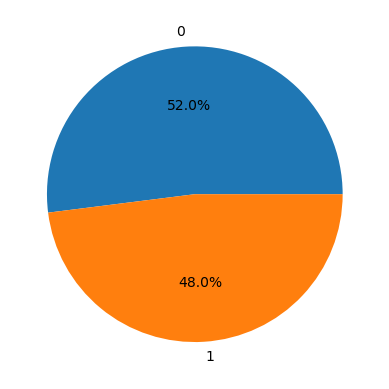

In [85]:
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

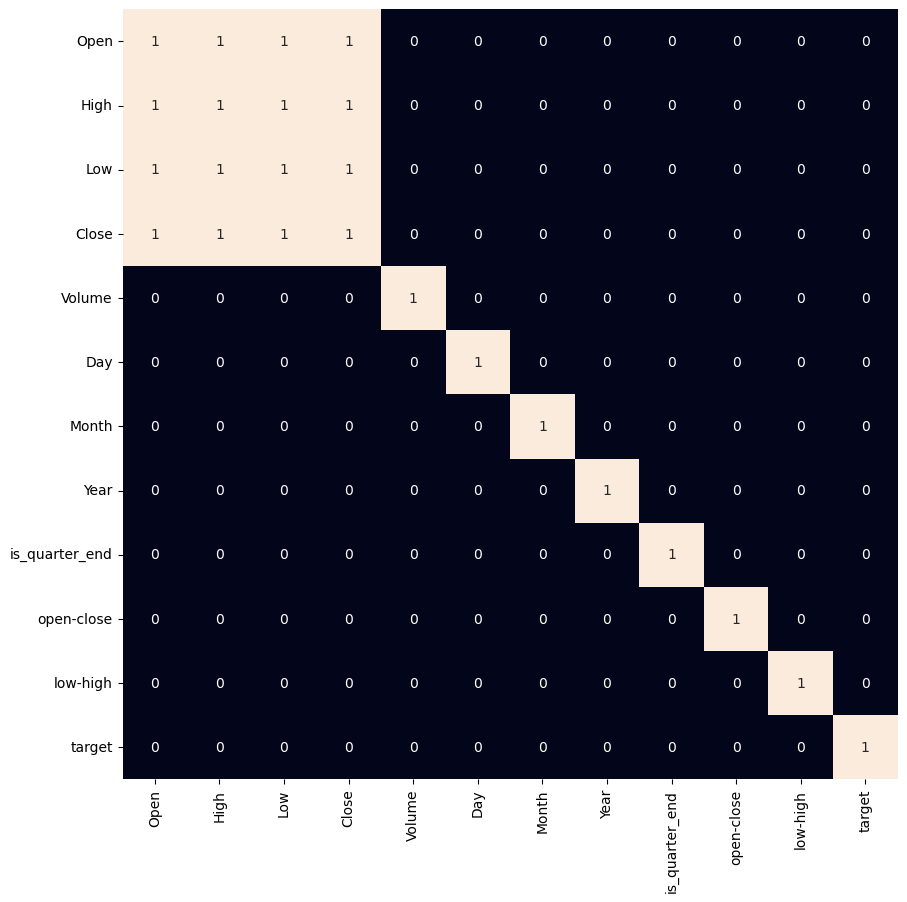

In [87]:
plt.figure(figsize=(10, 10))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [88]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(451, 3) (51, 3)
